In [16]:
# Imports PIL module 
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(r"Draws/draw7_no_background.jpg") 

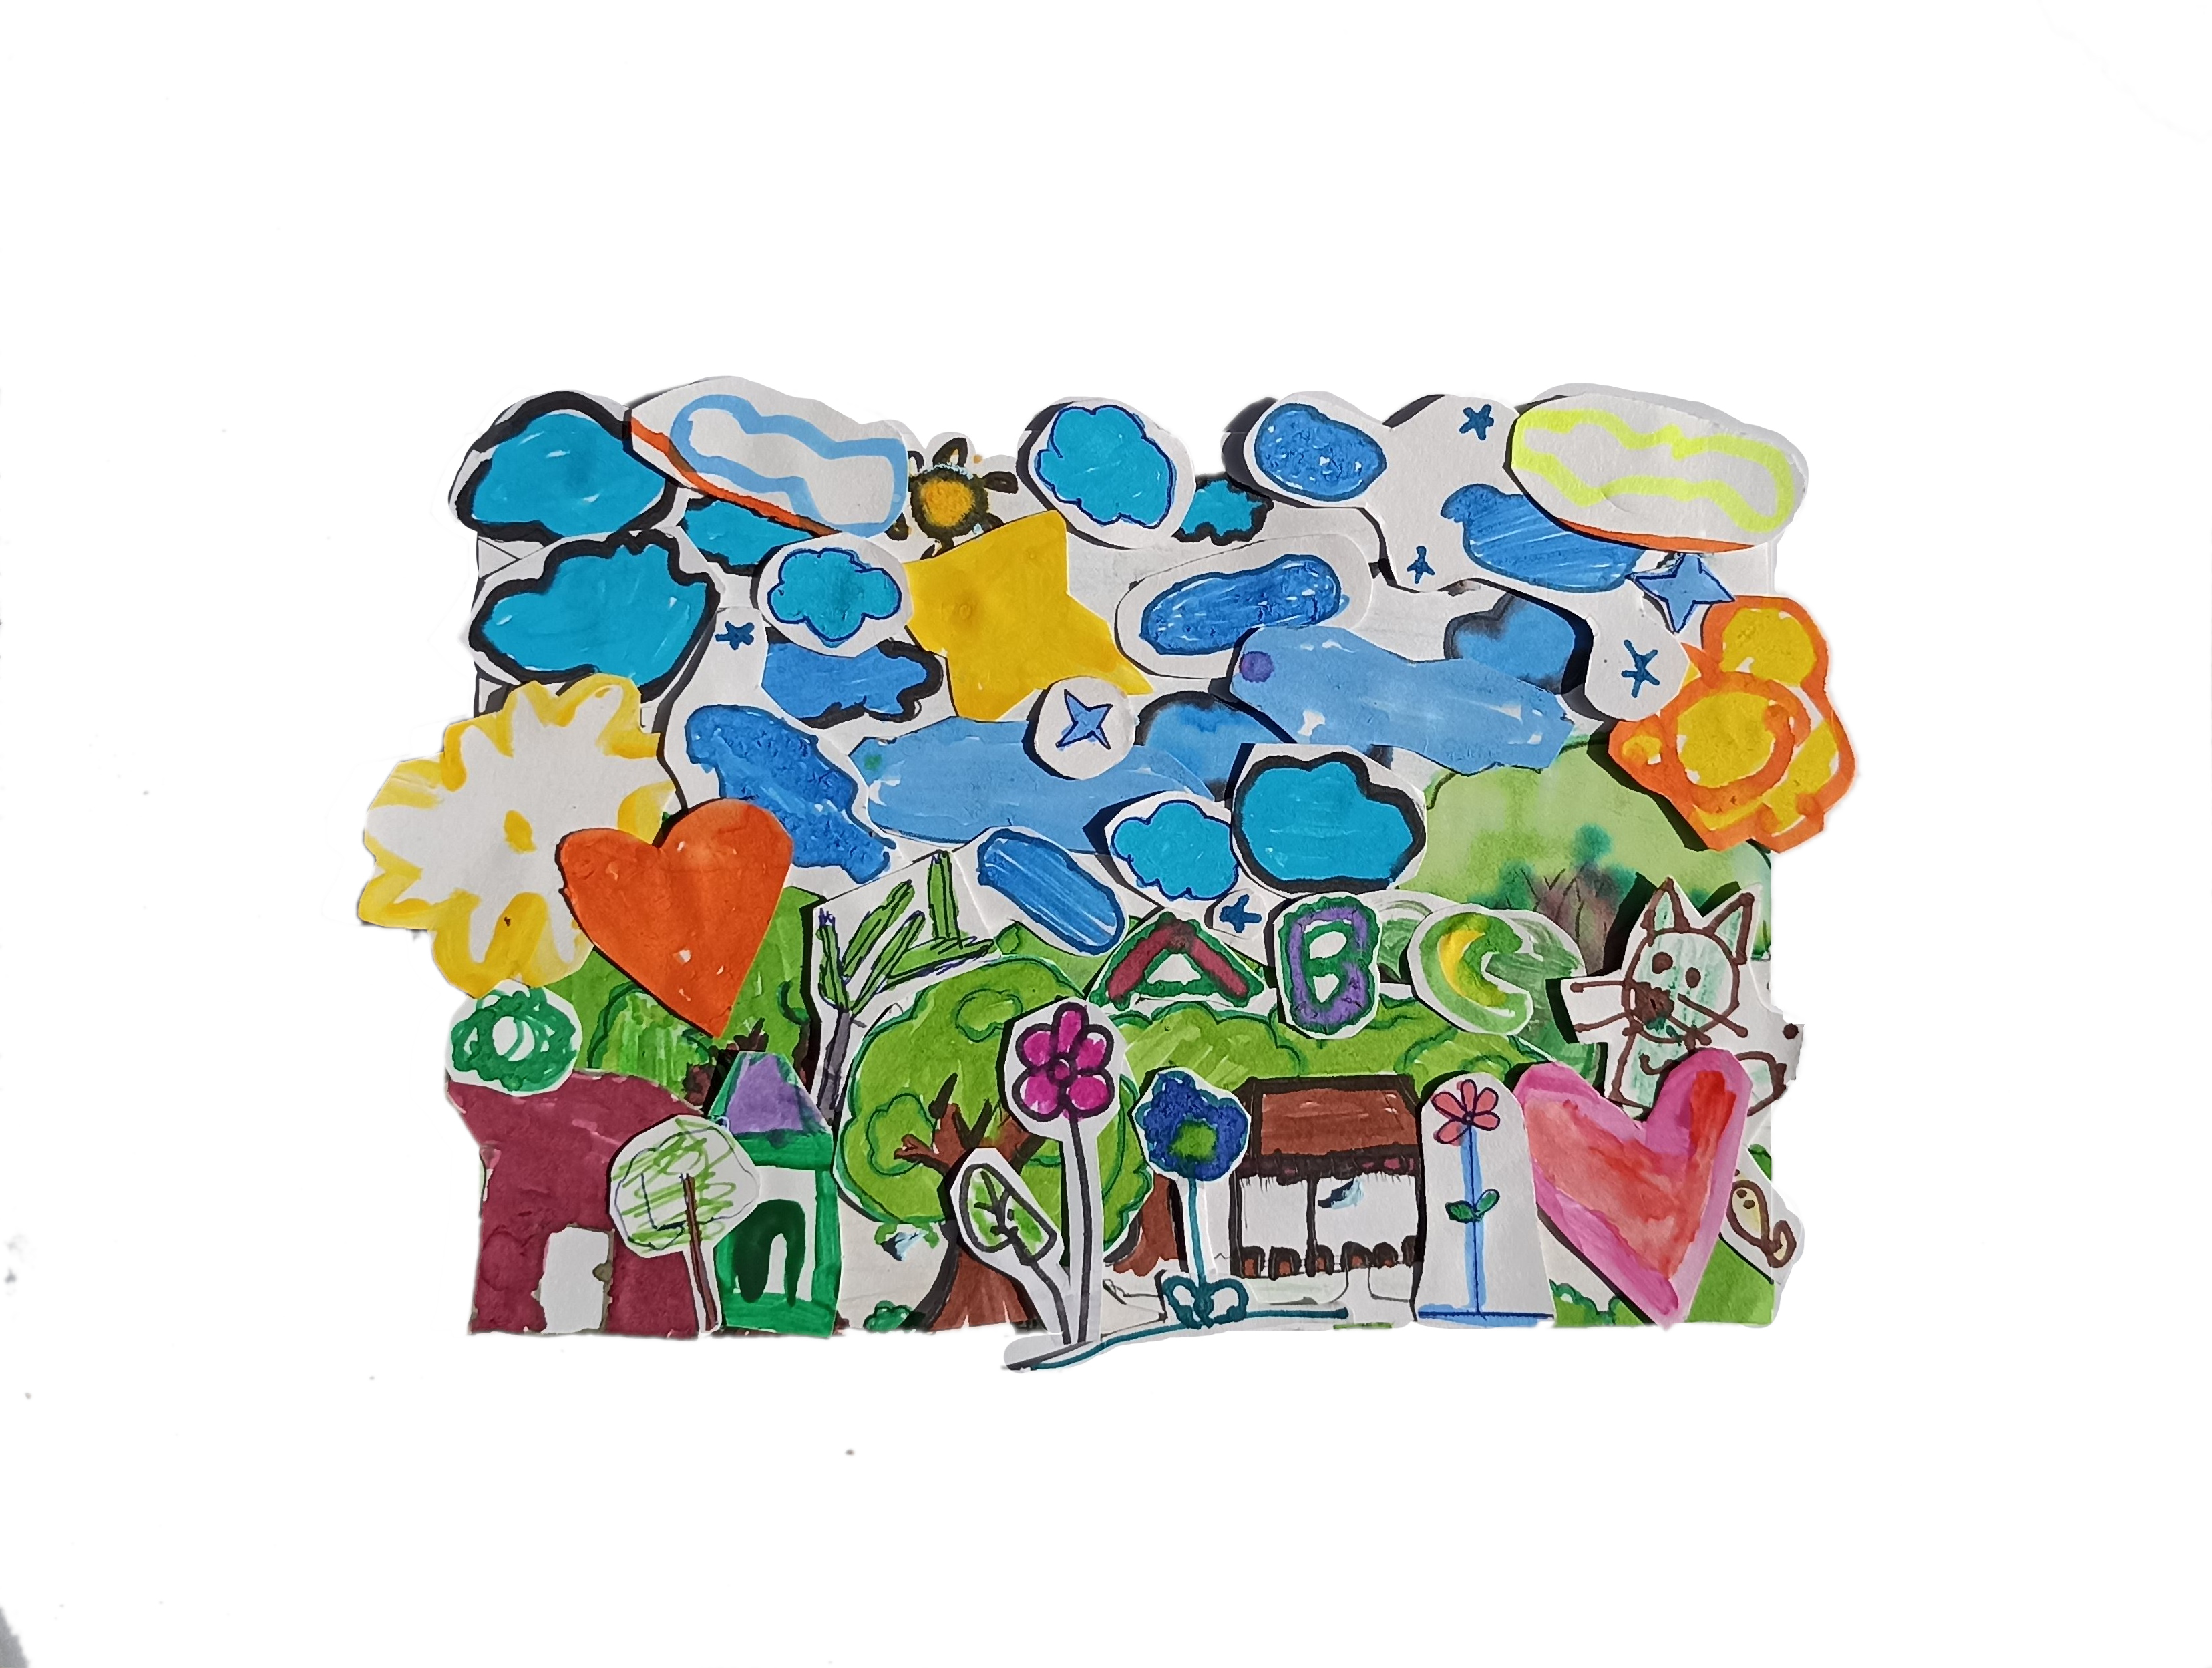

In [17]:
im

In [18]:
#2-tuple, containing the horizontal and vertical size in pixels.
im.size

(3312, 2497)

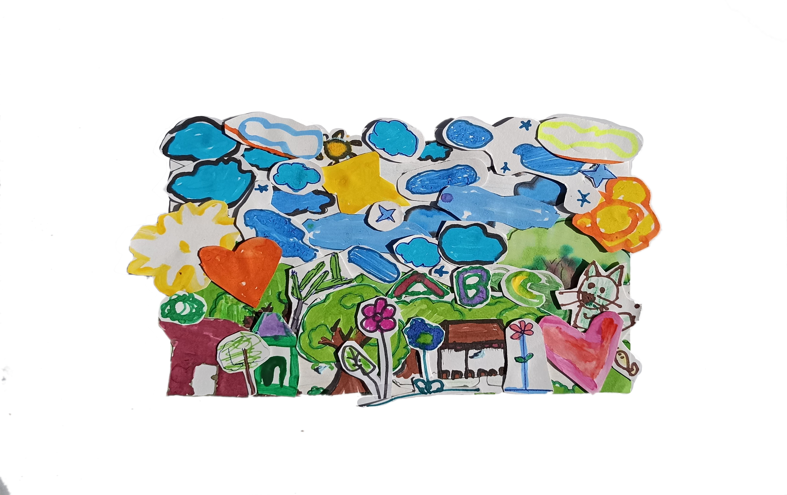

In [19]:
# We will need to resize the image
# The A4 size is 3508 x 2480px
# We will have 3 to 4 images per print so will need to divide the image size and discount the margin

# A4 sheet measurements
a4_width = 3508
a4_height = 2480 

# drawing measurements
im_tuple = (int(a4_width/4)-90,int(a4_height/4)-125)

# resize image to desired size
im=im.resize(im_tuple)
im

In [20]:
im.size

(787, 495)

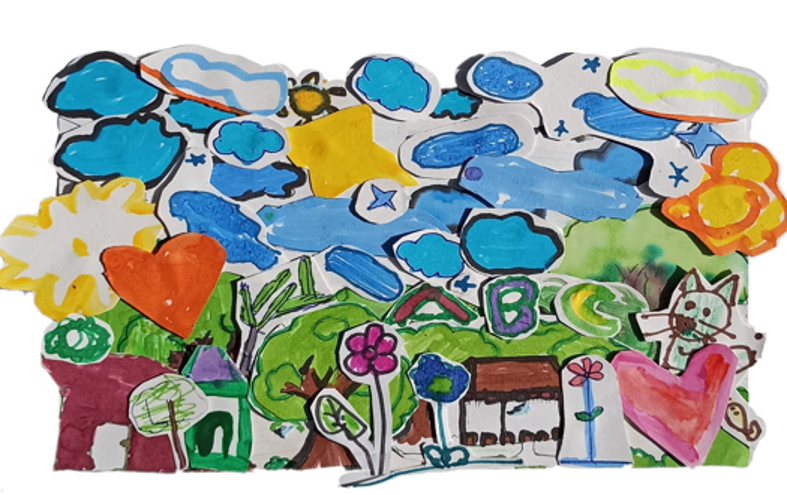

In [30]:
# image zoom

zoom = 1.5

im_res = im.crop((((im.size[0]/2)-im.size[0]/(zoom*2)),((im.size[1]/2)-im.size[1]/(zoom*2)),((im.size[0]/2)+im.size[0]/(zoom*2)),((im.size[1]/2)+im.size[1]/(zoom*2))))
im_res=im_res.resize(im_tuple)
im_res

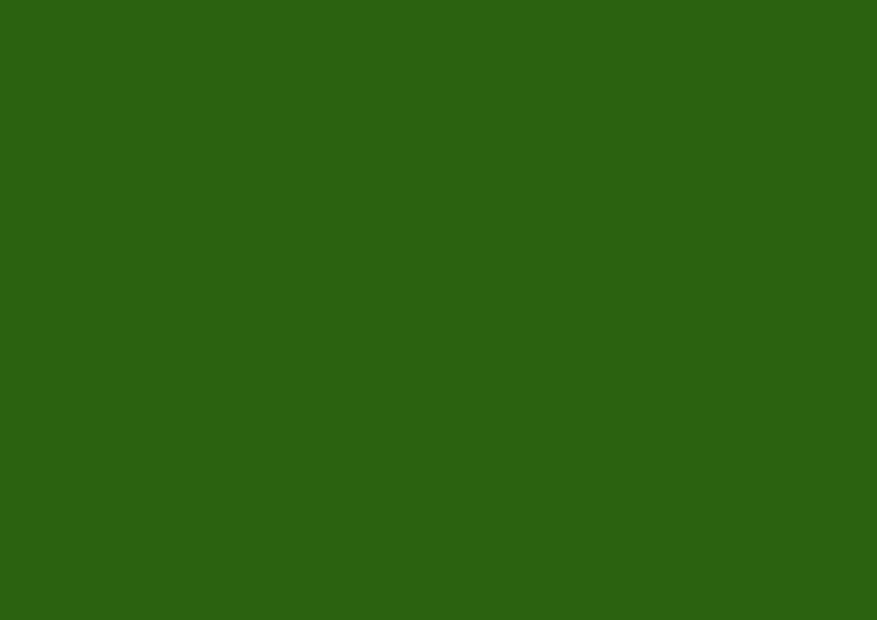

In [22]:
# Creating a image to use as background margin

VIOLET = (100, 27, 82)
GREEN = (43,98,16)

background_color = GREEN

background_tuple = (int(a4_width/4), (int(a4_height/4)))
background = Image.new('RGB', background_tuple, background_color)
background 

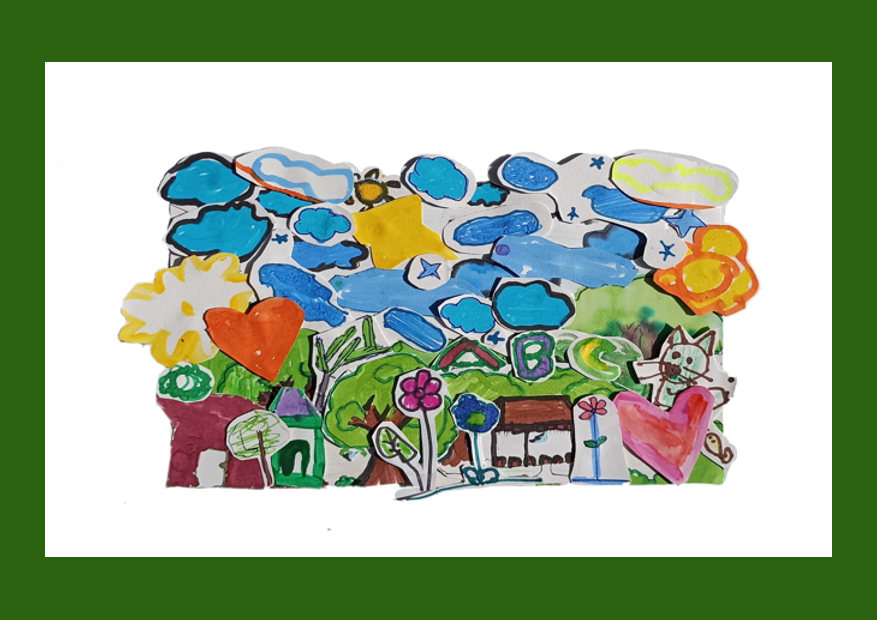

In [8]:
# Add drawing and background together

box = tuple((n - o) // 2 for n, o in zip(background_tuple, im_tuple))
background.paste(im_res, box)

background

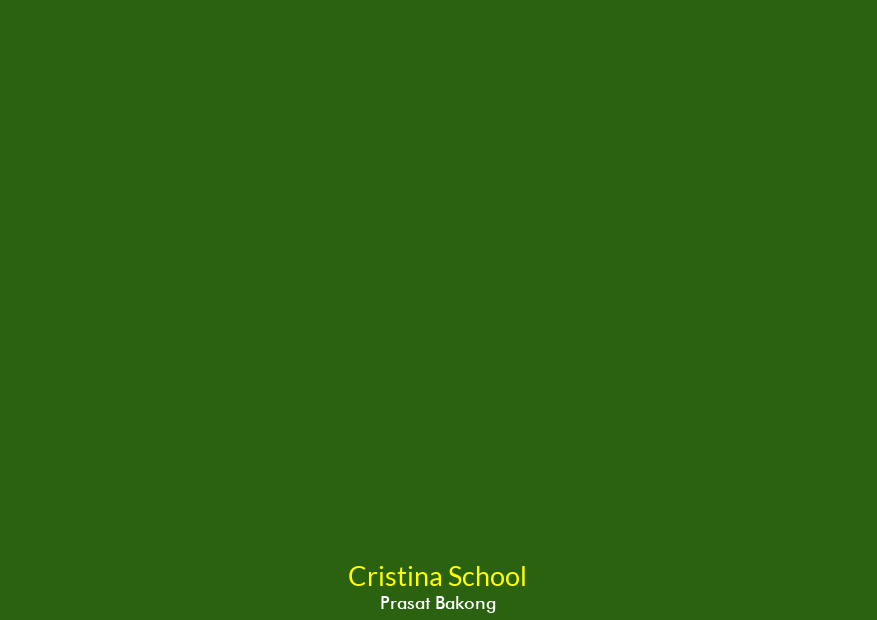

In [31]:
# Add text to image

from PIL import Image, ImageDraw, ImageFont
 
background_copy = background.copy()
    
# Font for first image
fnt1 = ImageFont.truetype('Fonts/Lato-Regular.ttf', 27)

# Font for 2nd image
fnt2 = ImageFont.truetype('Fonts/futura medium bt.ttf', 18)
d = ImageDraw.Draw(background_copy)

#msg1
msg1 = "Cristina School"
#msg2
msg2 = "Prasat Bakong"

W, H = background_copy.size

down_center_msg1 = (W/2, (H/2)+265)
down_center_msg2 = (W/2, (H/2)+292)

d.text(down_center_msg1, msg1, font=fnt1, fill=(255, 255, 0), align='center', anchor="mm")
d.text(down_center_msg2, msg2, font=fnt2, fill=(255, 255, 255), align='center', anchor="mm")

background_copy

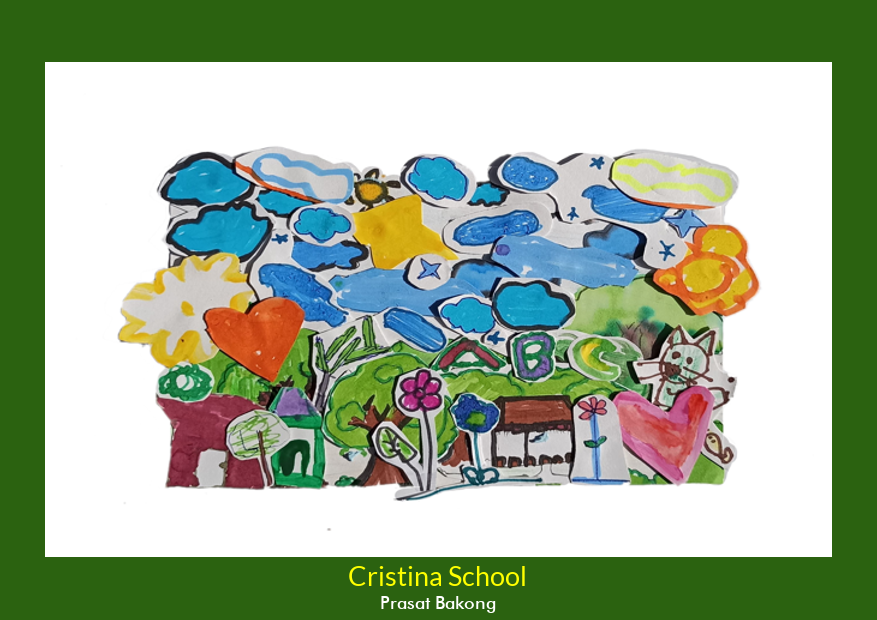

In [10]:
# Combine 1 image into 4 diferent ones 

b2 = background_copy.copy()

b2.paste(b2,(background_copy.size[0]*2,background_copy.size[1]))

b2

In [11]:
def append_images(images, direction='horizontal',
                  bg_color=(255,255,255), aligment='center'):
    """
    Appends images in horizontal/vertical direction.

    Args:
        images: List of PIL images
        direction: direction of concatenation, 'horizontal' or 'vertical'
        bg_color: Background color (default: white)
        aligment: alignment mode if images need padding;
           'left', 'right', 'top', 'bottom', or 'center'

    Returns:
        Concatenated image as a new PIL image object.
    """
    widths, heights = zip(*(i.size for i in images))

    if direction=='horizontal':
        new_width = sum(widths)
        new_height = max(heights)
    else:
        new_width = max(widths)
        new_height = sum(heights)

    new_im = Image.new('RGB', (new_width, new_height), color=bg_color)


    offset = 0
    for im in images:
        if direction=='horizontal':
            y = 0
            if aligment == 'center':
                y = int((new_height - im.size[1])/2)
            elif aligment == 'bottom':
                y = new_height - im.size[1]
            new_im.paste(im, (offset, y))
            offset += im.size[0]
        else:
            x = 0
            if aligment == 'center':
                x = int((new_width - im.size[0])/2)
            elif aligment == 'right':
                x = new_width - im.size[0]
            new_im.paste(im, (x, offset))
            offset += im.size[1]

    return new_im

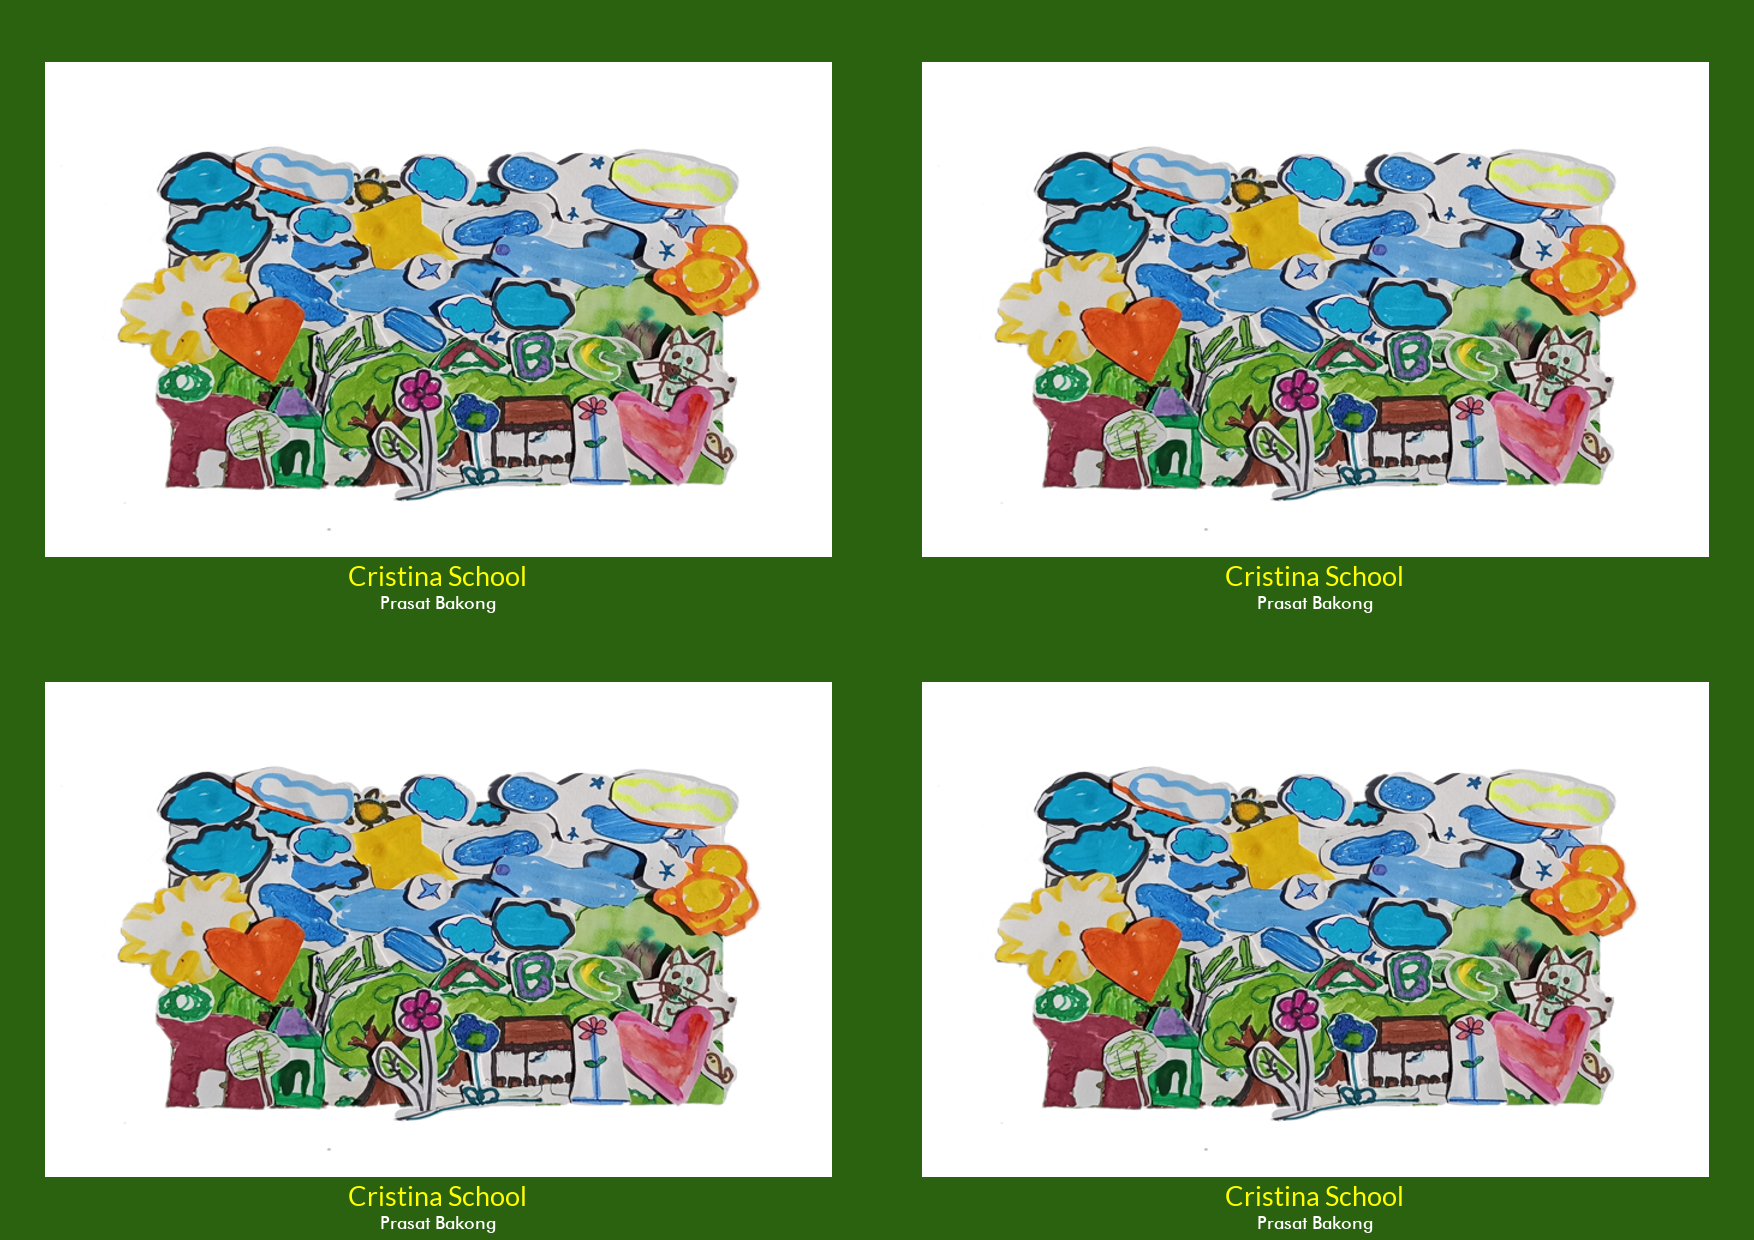

In [12]:
#Join 4 images together

images = [background_copy,background_copy]

horizontal = append_images(images, direction='horizontal')
final = append_images([horizontal,horizontal], direction='vertical')
final

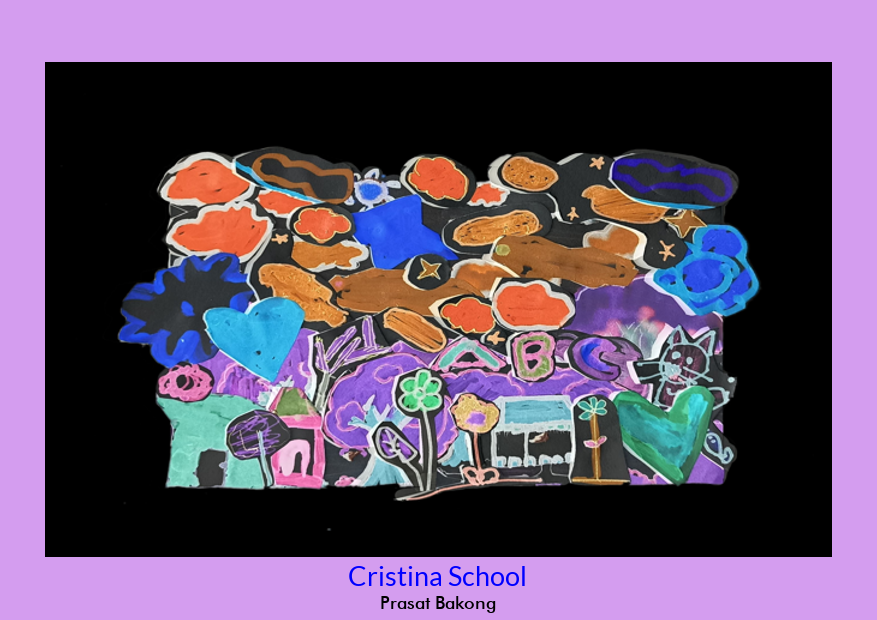

In [13]:
# invert colors

import PIL.ImageOps

PIL.ImageOps.invert(background_copy)